# Problemas Parcial 2


# Integración

### Problema 7

Una forma de generalizar el método de integración del trapecio para una integral doble
de una función f(x, y) consiste en dividir el plano xy en un grilla de cuadrados iguales y
calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado
pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio
R = 1 como sigue:

a) Cree una grilla entre $−R$ y $R$ en el plano xy, donde el número de cuadrados en cada
lado de la grilla sea $n$. Es decir, la grilla tendría $n + 1$ puntos en cada eje, y $n^{2}$ cuadrados pequeños.

b) Para cada cuadrado pequeño calculo el promedio de la función en los cuatro vértices
y multiplique por el área del cuadrado pequeño. Si el punto queda fuera de la esfera
asuma que el valor de la función $f(x, y)$ es cero.

In [17]:
import numpy as np

def f(x, y):
    
    if x ** 2 + y ** 2 <= 1:
        return np.sqrt(max(0, 1 - x ** 2 - y ** 2))
    else:
        return 0

def calculo_volumen(n):
    # Crear la grilla
    R = 1
    x = np.linspace(-R, R, n + 1)
    y = np.linspace(-R, R, n + 1)
    dx = x[1] - x[0]
    dy = y[1] - y[0]

    # Calcular el volumen
    volumen = 0
    for i in range(n):
        for j in range(n):
            # Promedio de la función en los cuatro vértices del cuadrado pequeño
            promedio = (f(x[i], y[j]) + f(x[i + 1], y[j]) + f(x[i], y[j + 1]) + f(x[i + 1], y[j + 1])) / 4

            
            volumen += promedio * dx * dy

    return volumen

n = 100
volumen = calculo_volumen(n)
print("El volumen de la semiesfera de radio R = 1 es:", volumen)

El volumen de la semiesfera de radio R = 1 es: 2.09384699833374


### Problema 10


La regla de Simpson 3/8 simple muestra a 

 $f^{(4)}(\xi)$ como la cuarta derivada de $f(x)$ evaluada en algún punto $\xi$ dentro del intervalo $[a, b]$.

Considerar la siguiente integral:

$$\mathcal{I}=\int_0^{3h}(x)(x-h)(x-2h)(x-3h) dx$$

Donde $h$ es el tamaño del intervalo. La integral $\mathcal{I}$ representa el promedio del valor de la función en los cuatro vértices de cada cuadrado pequeño de la grilla utilizada en el método de Simpson 3/8 simple.

Es posible demostrar que:

$$\mathcal{I}=-\frac{3}{80} h^5 f^{(4)}(\xi)$$

Por lo tanto, el error asociado a la regla de Simpson 3/8 simple se puede expresar como:

$$E=\frac{f^{(4)}(\xi)}{4!} \int_a^b\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)\left(x-x_3\right) dx=-\frac{3}{80} h^5 f^{(4)}(\xi)$$



In [16]:
from sympy import symbols, diff, integrate, factorial

x = symbols('x')

f = x * (x - 1) * (x - 2) * (x - 3)

f_4_dx = diff(f, x, 4)

integral = integrate((x - 0) * (x - 1) * (x - 2) * (x - 3), (x, 0, 3))

error = f_4_dx / (4 * factorial(4)) * integral

print("El error asociado a la regla de Simpson 3/8 simple es:", error)


El error asociado a la regla de Simpson 3/8 simple es: -9/40


### Problema 17

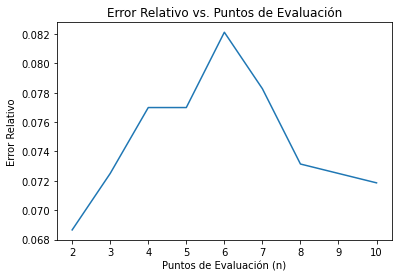

In [27]:
from sympy import symbols, exp, pi
from sympy.integrals.quadrature import gauss_laguerre

x = symbols('x')
f = x**3 / (exp(x) - 1)

integral_exacta = pi**4 / 15

n_valores = list(range(2, 11))
evaluacion_puntos = []
errores_relativos = []

for n in n_valores:
    
    nodos, pesos = gauss_laguerre(n, 0)

    estimated_integral = sum([pesos * f.subs(x, nodos) for nodos, pesos in zip(nodos, pesos)])

    error_relativo = estimated_integral / integral_exacta

    evaluacion_puntos.append(n)
    
    errores_relativos.append(error_relativo)

# Graficar 
import matplotlib.pyplot as plt

plt.plot(evaluacion_puntos, errores_relativos)
plt.xlabel('Puntos de Evaluación (n)')
plt.ylabel('Error Relativo')
plt.title('Error Relativo vs. Puntos de Evaluación')
plt.show()


### Problema 18

a.

In [29]:
import numpy as np
from scipy.special import roots_hermite

n_ceros = 20
ceros, pesos = roots_hermite(n_ceros)


for i in range(n_ceros):
    print(f"Cero {i+1}: {ceros[i]}, Peso {i+1}: {pesos[i]}")


Cero 1: -5.387480890011233, Peso 1: 2.229393645534103e-13
Cero 2: -4.603682449550744, Peso 2: 4.399340992273072e-10
Cero 3: -3.9447640401156248, Peso 3: 1.0860693707692404e-07
Cero 4: -3.3478545673832163, Peso 4: 7.802556478532028e-06
Cero 5: -2.7888060584281305, Peso 5: 0.00022833863601635422
Cero 6: -2.2549740020892752, Peso 6: 0.0032437733422378237
Cero 7: -1.7385377121165861, Peso 7: 0.024810520887463567
Cero 8: -1.2340762153953229, Peso 8: 0.10901720602002325
Cero 9: -0.7374737285453944, Peso 9: 0.2866755053628341
Cero 10: -0.2453407083009012, Peso 10: 0.4622436696006102
Cero 11: 0.2453407083009012, Peso 11: 0.4622436696006102
Cero 12: 0.7374737285453944, Peso 12: 0.2866755053628341
Cero 13: 1.2340762153953229, Peso 13: 0.10901720602002325
Cero 14: 1.7385377121165861, Peso 14: 0.024810520887463567
Cero 15: 2.2549740020892752, Peso 15: 0.0032437733422378237
Cero 16: 2.7888060584281305, Peso 16: 0.00022833863601635422
Cero 17: 3.3478545673832163, Peso 17: 7.802556478532028e-06
Cero 

b. utilizar el polinomio de Hermite de orden 1:
                                        
$H1​(x)=2x$

In [10]:
import numpy as np
from scipy.integrate import quad


def psi_1(x):
    return (1 / np.sqrt(2)) * np.exp(-x**2 / 2) * 2 * x

resultado, _ = quad(lambda x: psi_1(x)**2 * x**2, -np.inf, np.inf)

print("Valor cuadrático medio de la posición en el estado n=1:", resultado)


Valor cuadrático medio de la posición en el estado n=1: 2.658680776358273
